# Prática 03 - Clustering

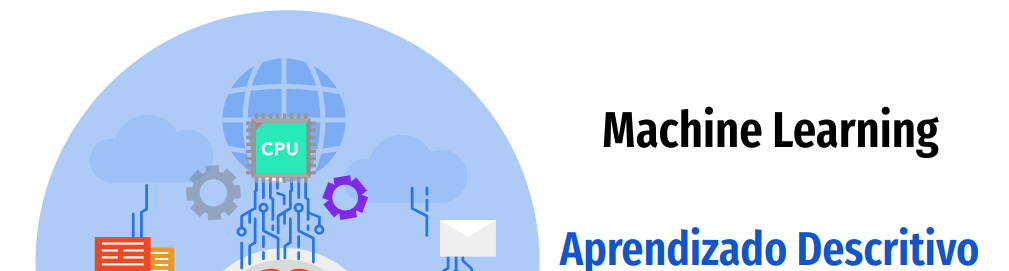

**Pessoa estudante**:  Luís Henrique Carvalho da Cruz (lhcc@cesar.school)

**Objetivo da Prática**

```
O objetivo desta prática é construir um técnica de clusterização baseada no K-means para o dataset Iris. Além disso, vamos avaliar baseado em métricas de clusterização.
```

**Instruções para a prática.**

1. Importar o dataset da célula descrita neste notebook.

2. Seuir as instruções detalhadas abaixo (9 etapas).

3. **Submeter no Classroom até a data limite. Após o prazo limite, punição de 10 pontos por dia de atraso.**

4. Use o chatGPT com moderação. Ele não acerta sempre não viu? 😅



![img](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

O conjunto de dados flor Iris, também conhecido como conjunto de dados Iris ou conjunto de dados Iris de Fisher, é um conjunto de dados frequentemente usado em aprendizado de máquina e estatística como exemplo para técnicas de classificação, clusterização e visualização de dados. Este conjunto de dados foi introduzido pela primeira vez pelo estatístico e biólogo britânico Sir Ronald Fisher em 1936 em seu artigo "The Use of Multiple Measurements in Taxonomic Problems" como um exemplo de análise discriminante linear.

O conjunto de dados consiste em amostras de três espécies diferentes de flores Iris:
- Iris setosa
- Iris virginica
- Iris versicolor.

Para cada amostra, são fornecidas quatro características: o comprimento e a largura das sépalas (parte externa da flor) e o comprimento e a largura das pétalas (parte interna da flor). Essas características foram medidas em centímetros.

Aqui está uma descrição mais detalhada das características:

- Comprimento da Sépala (em centímetros)
- Largura da Sépala (em centímetros)
- Comprimento da Pétala (em centímetros)
- Largura da Pétala (em centímetros)
- Espécie da flor Iris (Iris setosa, Iris virginica ou Iris versicolor)

Este conjunto de dados é amplamente disponível e é considerado um padrão na comunidade de aprendizado de máquina para testar e validar algoritmos e técnicas. Ele também é frequentemente usado em tutoriais e cursos introdutórios de aprendizado de máquina devido à sua simplicidade e clareza

Nesta base, vamos tentar agrupar as flores por informações do tamanho de suas pétalas

1. Carregue a base e visualize algumas informações sobre a mesma [**5 Pontos**]
- head, info, describe

2. Selecione apenas as características relacionadas às pétalas [**5 Pontos**]
- 'petal length (cm)', 'petal width (cm)'

3. Plote a dispersão dessas características [**5 Pontos**]
- plt.scatter

4. Padronize os dados (não é recomendado utilizar técnicas não-lineares) [**15 Pontos**]
- Avalie qual método utilizar de acordo com as técnicas vistas
- Plote novamente a dispersão

5. Crie e treine modelos KMeans com valores de k que achar válido (de acordo com a visualização) [**15 Pontos**]

6. Plote a dispersão juntamente com os kmeans.cluster_centers_ e cores correspondentes aos grupos [**10 Pontos**]
- `kmeans.labels_` pode ser utilizado como cores

7. Analise o melhor valor de K utilizando o método Elbow baseado na inércia
kmeans.inertia_ [**15 Pontos**]

8. Analise o melhor valor de K utilizando o Silhouette Score
silhouette_score [**15 Pontos**]

9. Baseando-se no melhor k encontrado: [**15 Pontos**]
- compare o resultado obtido com as espécies reais visualmente
- descreva os representantes dos grupos (centróides) e cada um dos clusters encontrados com base em suas características
- qual(is) técnica(s) poderiam ser utilizadas caso fosse necessário encontrar outliers? Implemente e demonstre visualmente.

## Parte 1 - Importação do Dataset

**Pontuação: Sem pontuação nesta etapa.**

Seguir a célula abaixo!

In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import DBSCAN
import plotly.express as px

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_target = iris.target

In [ ]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Parte 2 - Selecionando somente as informações relacionadas às pétalas

In [ ]:
iris_df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace=True)

In [ ]:
iris_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## Parte 3 - Plotando a dispersão dessas características

Text(0, 0.5, 'petal width (cm)')

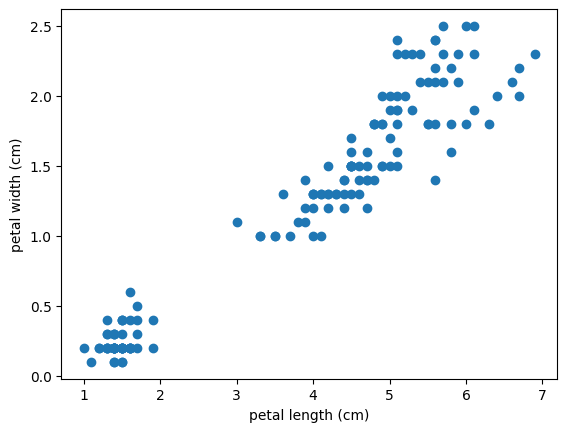

In [ ]:
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

## Parte 4 - Padronizando os dados

De modo a preservar a escala dos dados, será usado o StandardScaler, que é o mais indicado para clusterização.

Text(0, 0.5, 'petal width (scaled)')

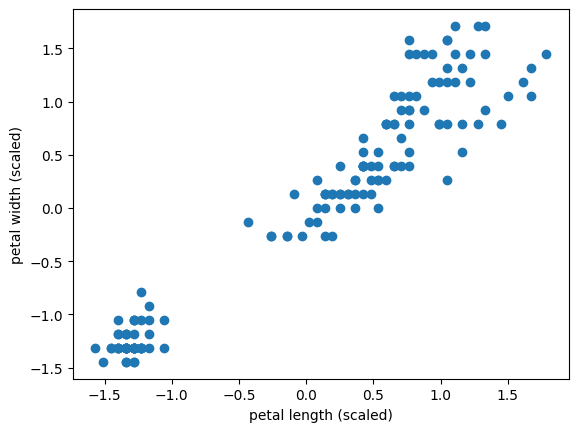

In [ ]:
scaler = StandardScaler()
scaler.fit(iris_df)

iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris_df.columns)

plt.scatter(iris_df_scaled['petal length (cm)'], iris_df_scaled['petal width (cm)'])
plt.xlabel('petal length (scaled)')
plt.ylabel('petal width (scaled)')

A distribuição acima está visualmente similar, o que é esperado, visto que o padronizador StandardScaler não altera a distribuição (e isso é importante na clusterização)

## Parte 5 e 6 - Treinamento do modelo k-means

In [ ]:
def train_and_plot_kmeans(dataset: pd.DataFrame, k: int):
  kmeans = KMeans(n_clusters=k, random_state=42)

  kmeans.fit(dataset)

  # Get cluster labels (predicted clusters)
  cluster_labels = kmeans.labels_

  # Get cluster centroids
  cluster_centers = kmeans.cluster_centers_

  plt.figure(figsize=(8, 6))

  # Plot points with cluster labels
  plt.scatter(dataset['petal length (cm)'], dataset['petal width (cm)'], c=cluster_labels, cmap='viridis', edgecolor='k', s=50, alpha=0.8)

  # Plot cluster centers
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')

  plt.xlabel('Petal Length (scaled)')
  plt.ylabel('Petal Width (scaled)')
  plt.title('K-means Clustering on Iris Petal Data')

  plt.legend()
  plt.show()

  return cluster_centers, cluster_labels

Aqui nós sabemos que temos somente 3 possíveis espécies de iris nesse dataset, então podemos usar k = 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



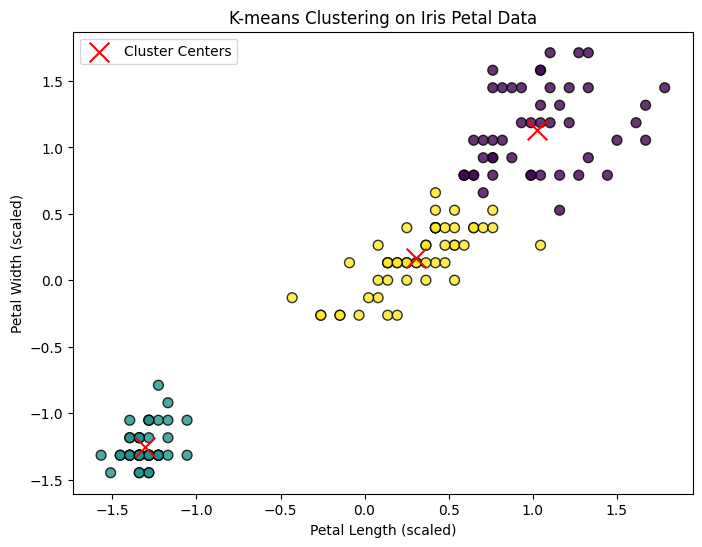

(array([[ 1.02799959,  1.12797813],
        [-1.30498732, -1.25489349],
        [ 0.3058728 ,  0.16541778]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32))

In [ ]:
train_and_plot_kmeans(iris_df_scaled, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



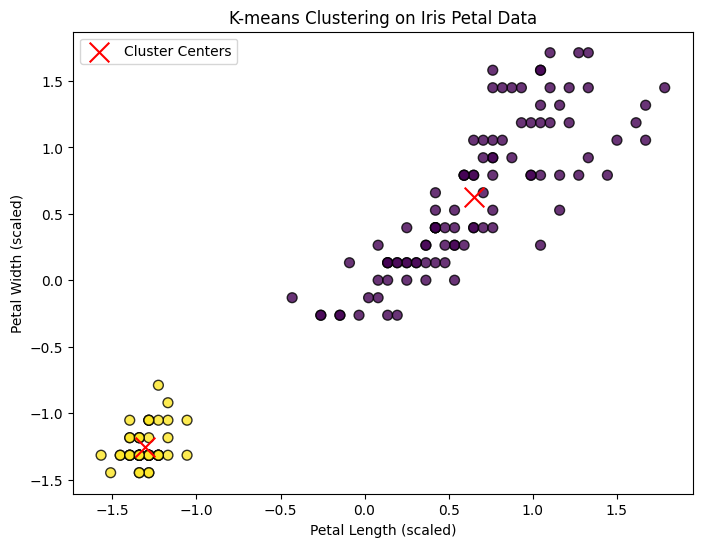

(array([[ 0.65249366,  0.62744675],
        [-1.30498732, -1.25489349]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32))

In [ ]:
# exemplo para k = 2 (baseado na visualização, pode fazer sentido)
train_and_plot_kmeans(iris_df_scaled, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



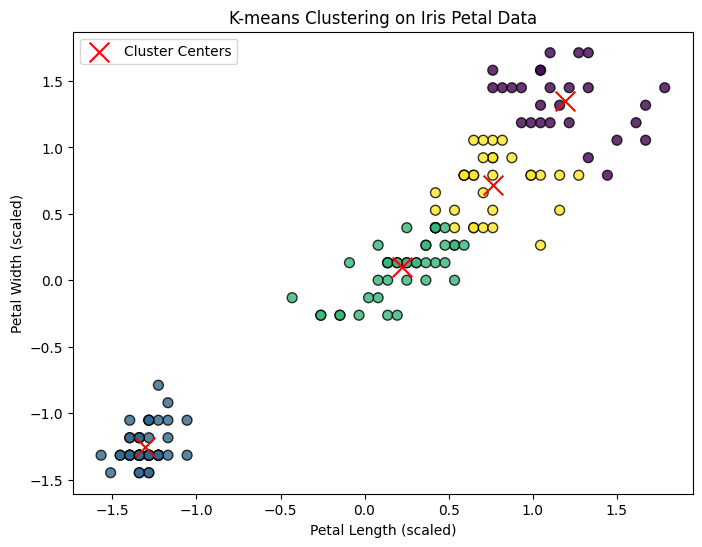

(array([[ 1.19009152,  1.34645099],
        [-1.30498732, -1.25489349],
        [ 0.22415599,  0.09803464],
        [ 0.76459173,  0.71848526]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0,
        3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0,
        0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3], dtype=int32))

In [ ]:
train_and_plot_kmeans(iris_df_scaled, 4)

Se não soubéssemos a quantidade de tipos de iris, apenas baseado na observação da distribuição, não acho que faria sentido um valor de k menor que 2 ou maior que 4.

## Parte 7 - plotando o gráfico da inércia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

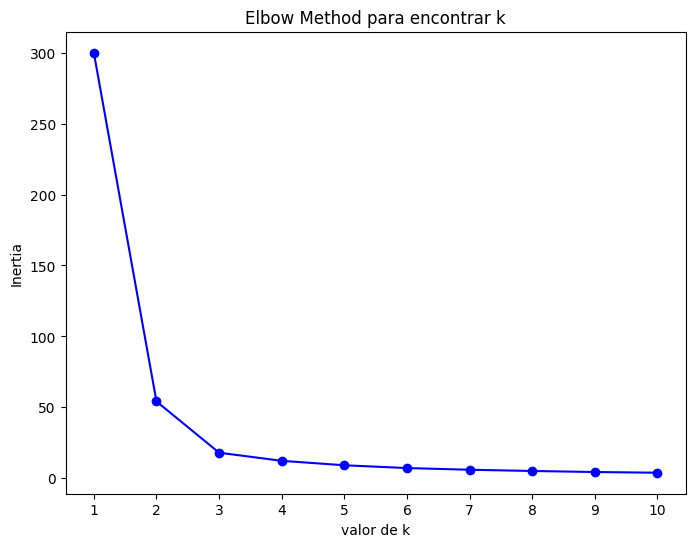

In [ ]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    # Initialize KMeans with current value of K
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit KMeans to the dataset
    kmeans.fit(iris_df_scaled)

    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o', linestyle='-', color='b')
plt.xlabel('valor de k')
plt.ylabel('Inertia')
plt.title('Elbow Method para encontrar k')
plt.xticks(k_values)
plt.show()

Observando o gráfico acima, vemos que a inércia pouco se altera após k = 3.

## Parte 8 - plotando o gráfico do silhouette score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

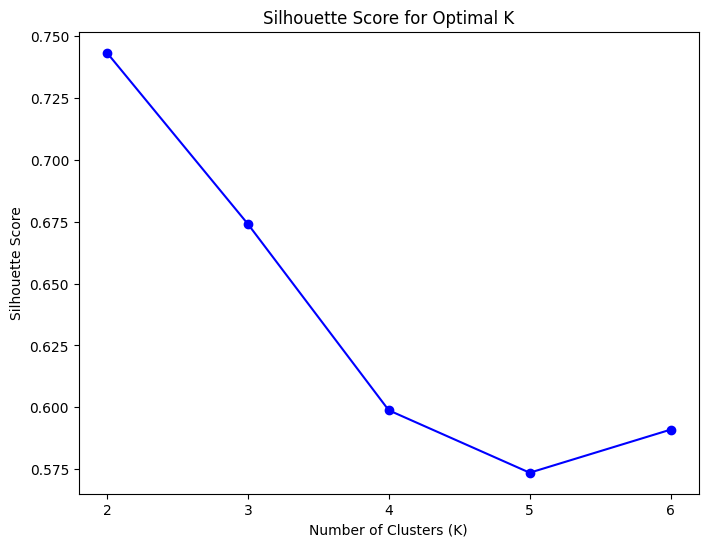

In [ ]:
silhouette_scores = []

k_values = range(2, 7)  # o silhouette score requer k > 1

for k in k_values:
    # Initialize KMeans with current value of K
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit KMeans to the dataset
    kmeans.fit(iris_df_scaled)

    # Compute the silhouette score for the current clustering
    score = silhouette_score(iris_df_scaled, kmeans.labels_)

    # Append the silhouette score to the list of scores
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.xticks(k_values)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2 The average silhouette_score is : 0.7433719503339133
For n_clusters = 3 The average silhouette_score is : 0.6741313114151009


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4 The average silhouette_score is : 0.5988016665822246
For n_clusters = 5 The average silhouette_score is : 0.5705660793253495


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 6 The average silhouette_score is : 0.5830785189335124


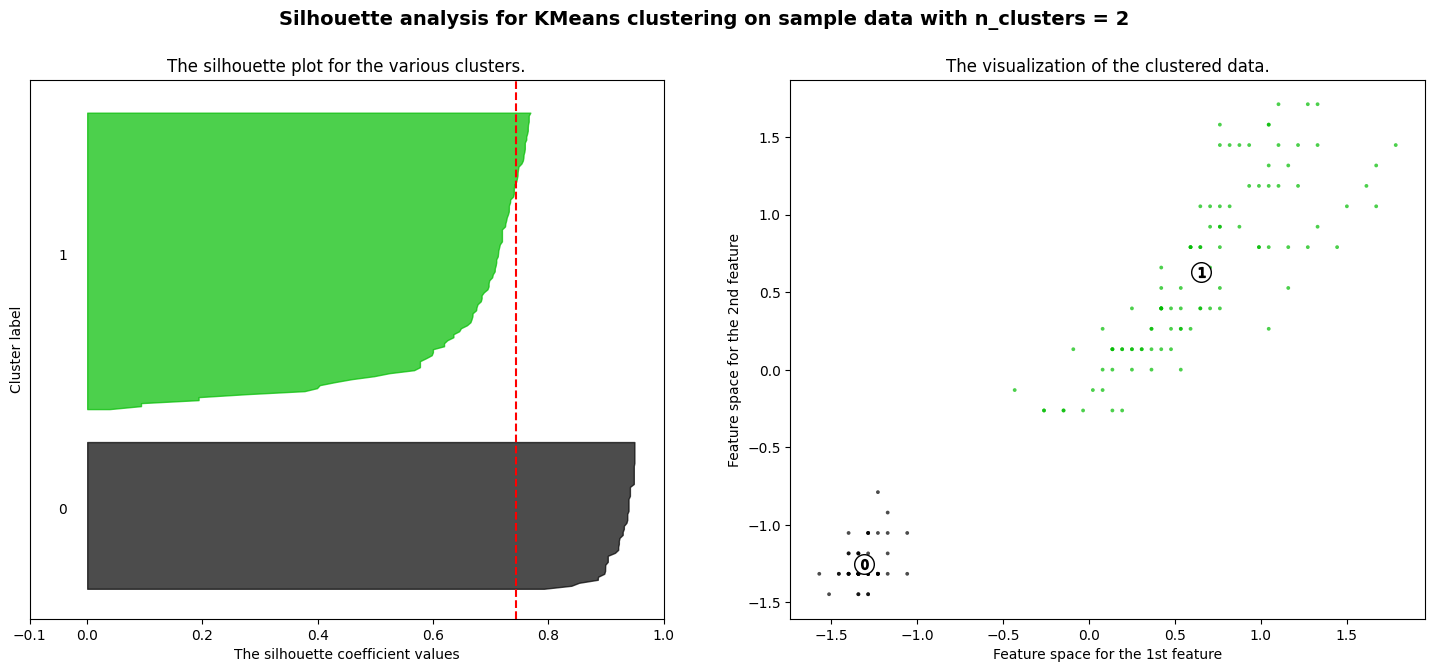

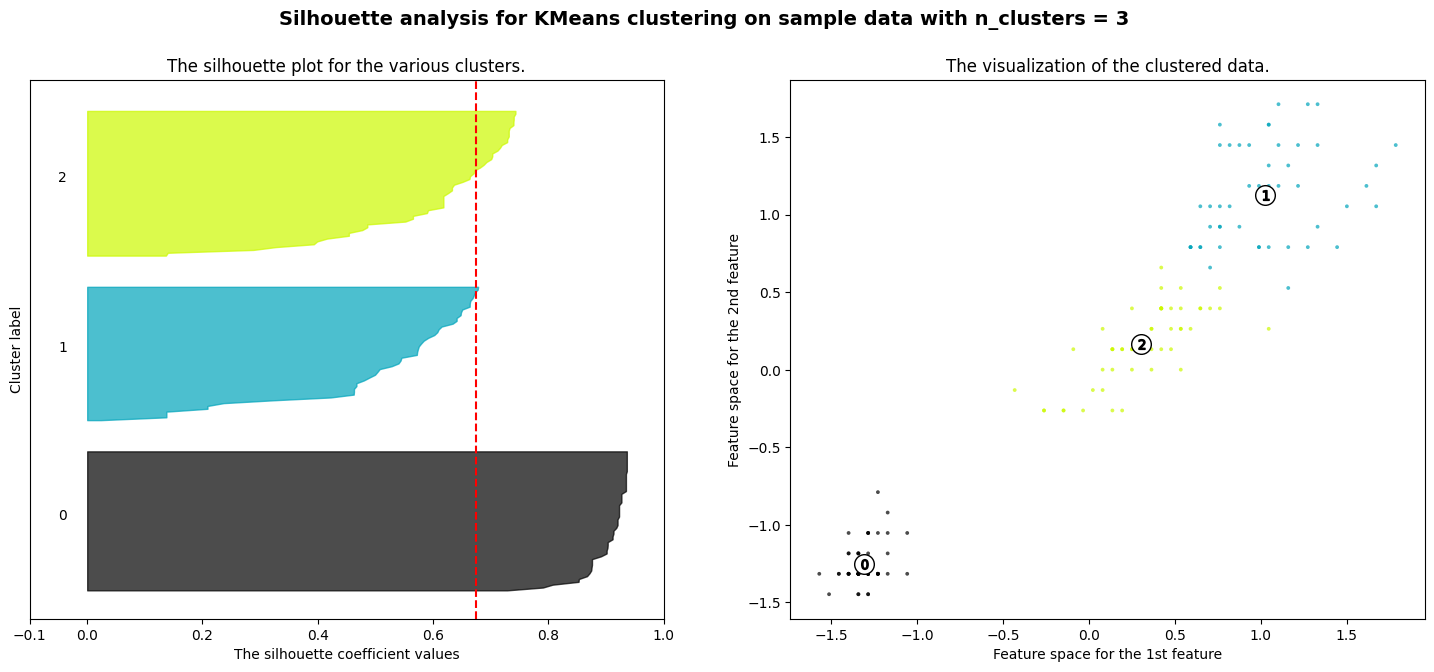

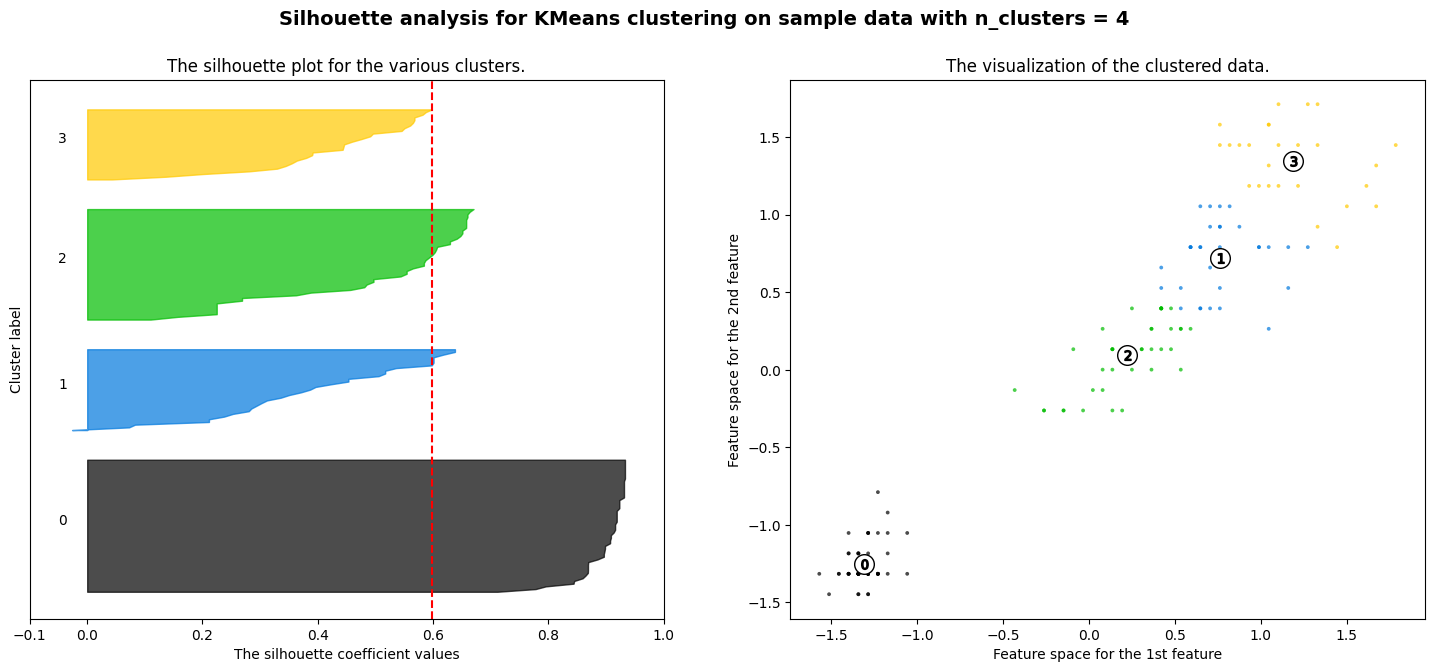

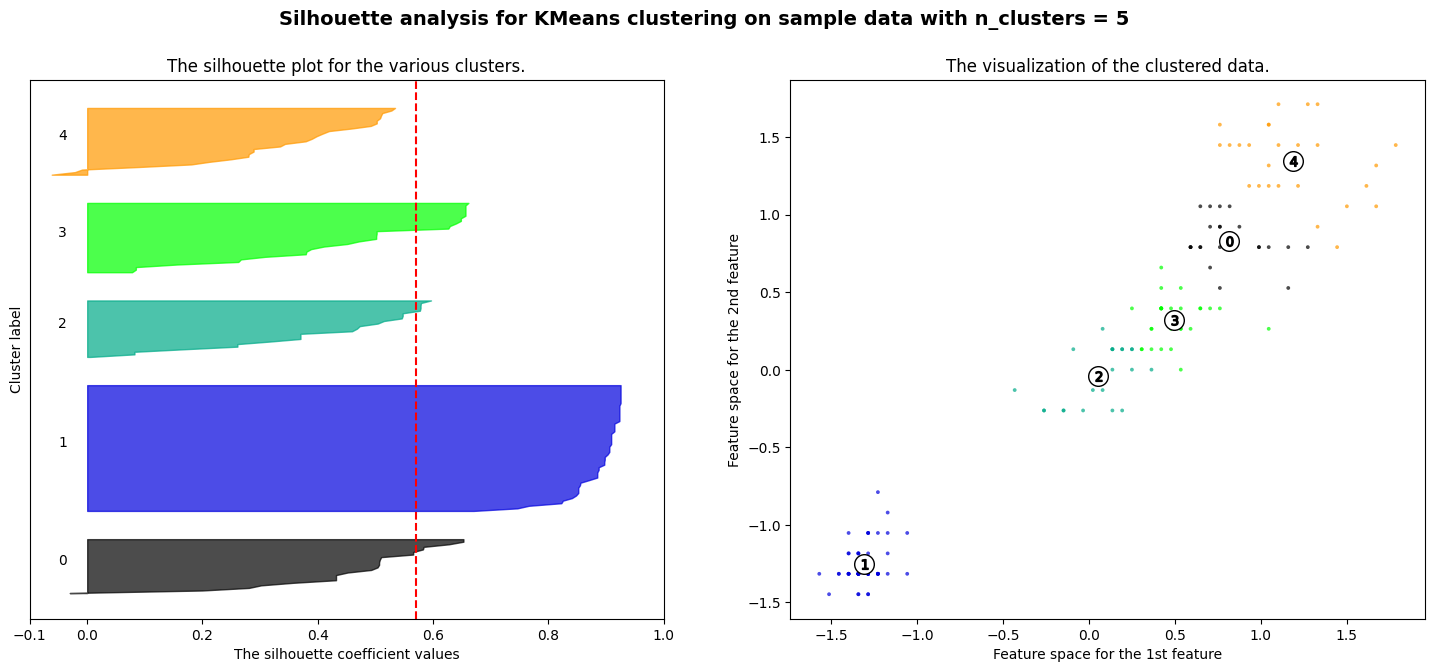

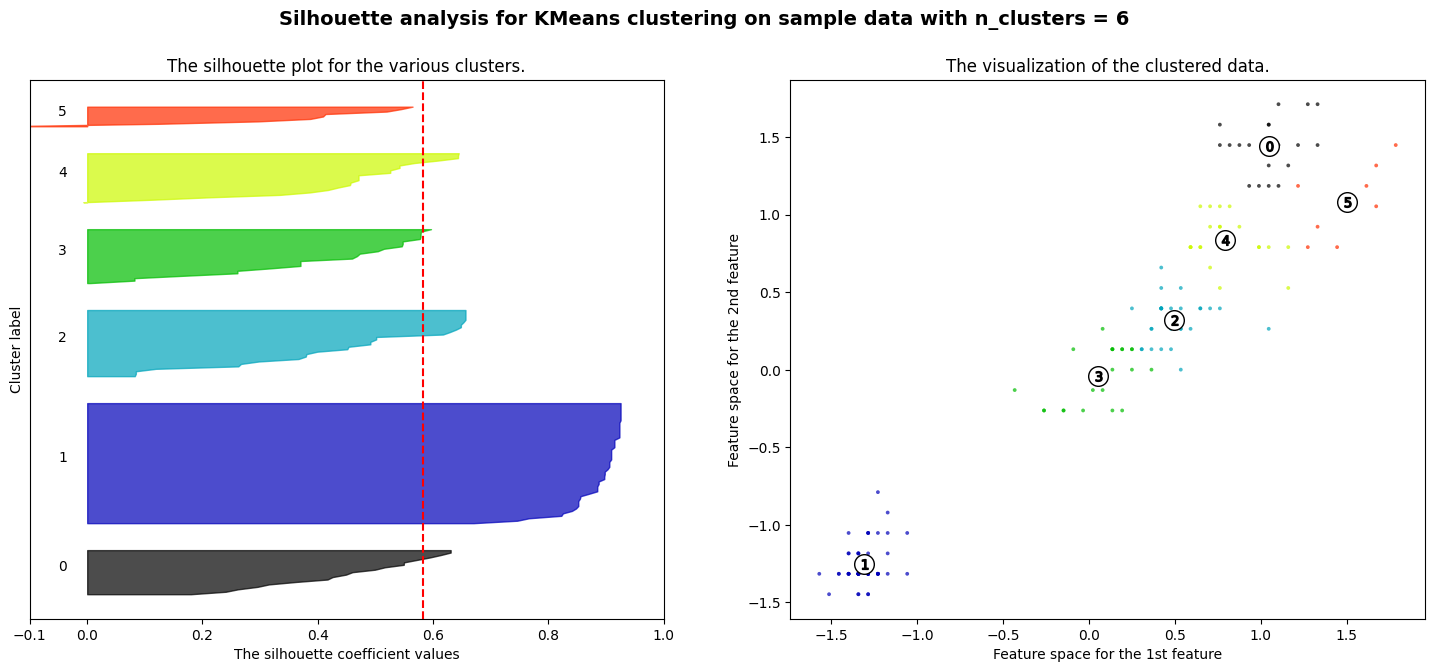

In [ ]:
# ESSA CÉLULA FOI TIRADA DA FONTE:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(iris_df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(iris_df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(iris_df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(iris_df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        iris_df_scaled['petal length (cm)'], iris_df_scaled['petal width (cm)'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


A análise dos gráficos de Silhouette Score acima aponta que o valor ótimo de k é 2, que é o que maximiza o valor do Silhouette Score (distância intra-cluster média).

## Parte 9

### 9.1, 9.2 - Comparando com as espécies reais descreva os representantes dos grupos (centróides) e cada um dos clusters encontrados com base em suas características

De acordo com o elbow method, o melhor k encontrado foi k = 3, que vai de acordo com a realidade do dataset (que contém 3 espécies de iris)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



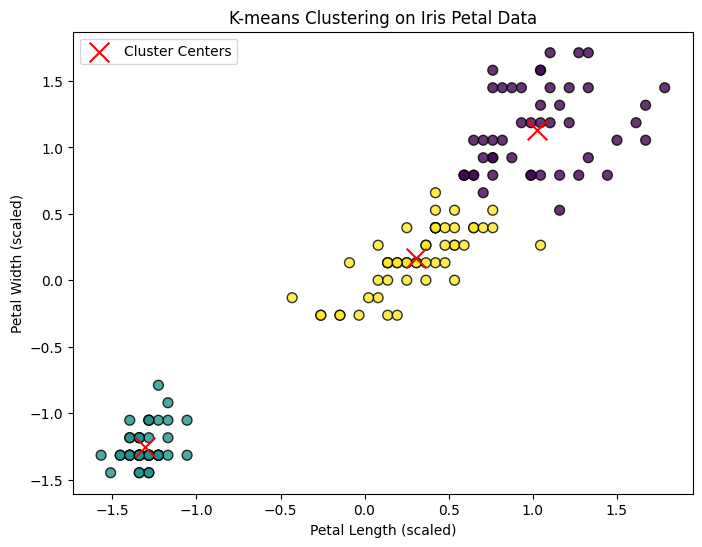

In [ ]:
cluster_centers, cluster_labels = train_and_plot_kmeans(iris_df_scaled, 3)

Abaixo está a classificação dos 3 tipos flores baseados no tamanho da petala:
- Setosa: menor
- Versicolor: "do meio"
- Virginica: maior

De acordo com a referencia, o cluster verde seria referente a especie Setosa, o cluster amarelo se refere a Versicolor, e o cluster roxo a flor maior, a Virginica. Vamos validar retornando os dados às escalas originais e plotando o gráfico mostrando os centros dos clusters.

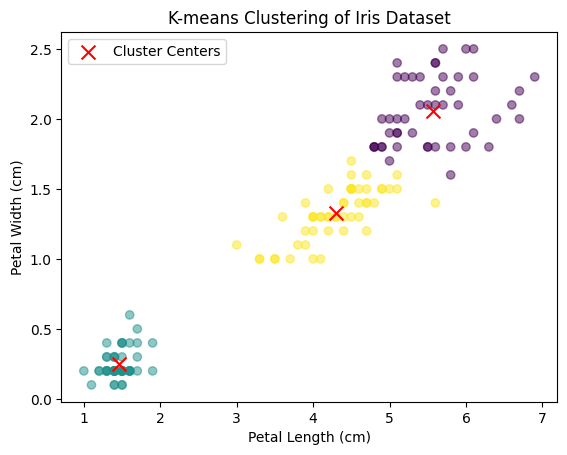

In [ ]:
cluster_centers_original = scaler.inverse_transform(cluster_centers)

plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers_original[:, 0], cluster_centers_original[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-means Clustering of Iris Dataset')
plt.legend()
plt.show()

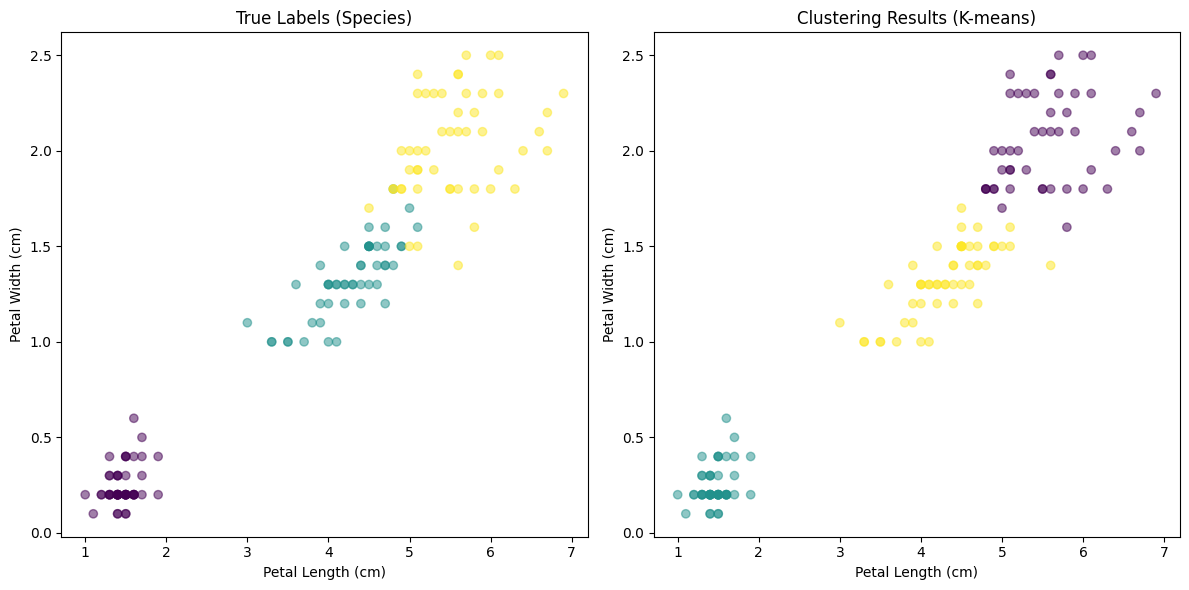

In [ ]:
# Visualize the clustering results and true labels
plt.figure(figsize=(12, 6))

# Plot for True Labels
plt.subplot(1, 2, 1)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris_target, cmap='viridis', alpha=0.5)
plt.title('True Labels (Species)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
# plt.legend(title='Species', loc='upper left')

# Plot for Clustering Results
plt.subplot(1, 2, 2)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering Results (K-means)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
# plt.legend(title='Cluster', loc='upper left')

plt.tight_layout()
plt.show()

Plotando cima as especies reais lado a lado com os clusters obtidos, vemos uma semelhança visivel no agrupamento. A diferença é que para as especies reais existe um overlapping entre a Versicolor e a Virginica.

### 9.3 - qual(is) técnica(s) poderiam ser utilizadas caso fosse necessário encontrar outliers? Implemente e demonstre visualmente

Podemos usar o clustering por DBSCAN para uma maior robustez a outliers.

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=10)

dbscan.fit(iris_df_scaled)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 11


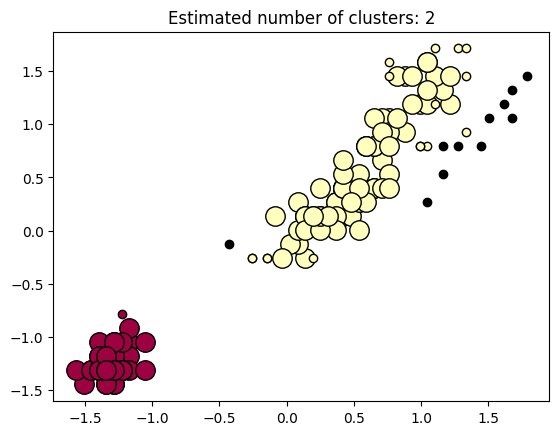

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = iris_df_scaled[class_member_mask & core_samples_mask]
    plt.plot(
        xy['petal length (cm)'],
        xy['petal width (cm)'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = iris_df_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy['petal length (cm)'],
        xy['petal width (cm)'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

No caso acima, o DBSCAN estimou dois clusters, diferente do resultado obtido com k-means validando o k com elbow method. Além do mais, o uso do DBSCAN não teria muita relevância pois ele encontrou 0 pontos outliers.

Podemos plotar os gráficos boxplot do dataset para tentar encontrar outliers:

In [ ]:
px.box(iris_df, x='petal length (cm)')

In [ ]:
px.box(iris_df, x='petal width (cm)')

Podemos ver que não há outliers apontados pelo boxplot também.